# Data Scientist Associate Practical Exam Submission

The point of this analysis is to explore and clean the provided dataset, visualize the distribution of variables, describe the relationship between ownership and overall rating, build and compare two machine learning models to predict whether a review was written by an owner or not. 


# Task 1 
In Task 1 code, I am performing several data cleaning operations on a pandas DataFrame named "df". First we want to get to know the df, to see if there is a need for cleaning the data and if the column names fit the data and descriptions. 

In [1]:
import pandas as pd

"Performs several data exploration steps, including checking the number of rows and columns in the DataFrame, checking the first few rows of the DataFrame, checking the data types of the columns, and checking for missing values in the DataFrame. These steps are intended to give a quick overview of the data and identify any potential issues that need to be addressed before proceeding with further analysis!"

# read the CSV file and create a pandas DataFrame object
df = pd.read_csv("electric_bike_ratings_2212.csv")

# check the number of rows and columns in the DataFrame
print("Shape of the DataFrame:", df.shape)

# check the data types of the columns
print("Data types of columns:\n", df.dtypes)

# check for missing values in the DataFrame
print("Number of missing values in each column:\n", df.isna().sum()) 

Shape of the DataFrame: (1500, 8)
Data types of columns:
 owned                int64
make_model          object
review_month        object
web_browser         object
reviewer_age        object
primary_use         object
value_for_money     object
overall_rating     float64
dtype: object
Number of missing values in each column:
 owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64


In [2]:
"These two lines of code are setting the pandas options to display all rows and columns of a DataFrame. By default, pandas only displays a truncated view of a DataFrame with a maximum number of rows and columns."

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# check the first few rows of the DataFrame
# we can instantly see that the format of review_month needs modification to show only month in "Jan, Feb, Mar..." format
df.head() 

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [4]:
# dataframe column names
df.columns

Index(['owned', 'make_model', 'review_month', 'web_browser', 'reviewer_age',
       'primary_use', 'value_for_money', 'overall_rating'],
      dtype='object')

In [5]:
"This code is looping through all columns of a given DataFrame df. For each column, it checks if the number of unique values is less than 50 (to avoid distinct values display). If so, it prints the name of the column and all unique values of that column. The purpose of this code is to quickly identify any columns with a small number of unique values, which could potentially be categorical variables. By printing out the unique values, it allows for easy inspection and identification of any potential issues or errors in the data."

# Iterate through the columns
for col in df.columns:
    # Get the unique values in the column
    unique_values = df[col].unique()
    
    # Check if the number of unique values is less than 50
    if len(unique_values) < 50:
        # Print the column name and the unique values
        print(f'{col}:')
        for value in unique_values:
            print(f'  - {value}')

owned:
  - 1
  - 0
make_model:
  - Nielah-Eyden
  - Nielah-Keetra
  - Lunna-Keetra
  - Hoang-Keetra
  - Lunna-Eyden
  - Hoang-Eyden
web_browser:
  - Chrome
  - nan
  - IE
  - Firefox
  - Safari
  - Android
  - Opera
reviewer_age:
  - 23
  - 24
  - 28
  - 41
  - 33
  - 47
  - 20
  - 32
  - 35
  - 22
  - 29
  - 39
  - 42
  - 36
  - 40
  - 27
  - 48
  - 34
  - 16
  - 21
  - 25
  - 30
  - -
  - 46
  - 37
  - 31
  - 17
  - 44
  - 26
  - 38
  - 49
  - 50
  - 45
  - 19
  - 43
  - 18
primary_use:
  - Commuting
  - Leisure
value_for_money:
  - 5/10
  - 4/10
  - 3/10
  - 7/10
  - 6/10
  - 2/10
  - 9/10
  - 8/10
  - 10/10
  - 1/10


## Data cleaning

First, I renamed the columns of the DataFrame. Next, filter out rows where the "Reviewer_Age" column has missing values. Then, I removed missing values from the "Owned" column. After that, I replaced missing values in certain columns with specified values, and convert some columns to the appropriate data type. Finally, I removed all non-letter characters from the "Review_Month" column, and convert the "Reviewer_Age" column to an integer data type.

In [8]:
import numpy as np

# Rename the columns
df = df.rename(columns={
    'owned': 'Owned', 
    'make_model': 'Make_Model', 
    'review_month': 'Review_Month', 
    'web_browser': 'Web_Browser', 
    'reviewer_age': 'Reviewer_Age', 
    'primary_use': 'Primary_Use', 
    'value_for_money': 'Value_For_Money', 
    'overall_rating': 'Overall_Rating'
})

# Filter out rows where Reviewer_Age is missing
df = df[df["Reviewer_Age"] != "-"]

# Remove missing values from the Owned column
df = df.dropna(subset=['Owned'])

# Replace missing values with the given values
df['Make_Model'] = df['Make_Model'].fillna('unknown')
df['Review_Month'] = df['Review_Month'].fillna('unknown')
df['Web_Browser'] = df['Web_Browser'].fillna('unknown')
df['Reviewer_Age'] = df['Reviewer_Age'].fillna(df['Reviewer_Age'].mean())
df['Primary_Use'] = df['Primary_Use'].fillna('unknown')
df['Value_For_Money'] = df['Value_For_Money'].replace('null', '0')
# for x/10 in Value_For_Money returns x
df['Value_For_Money'] = df['Value_For_Money'].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) else x)
df['Overall_Rating'] = df['Overall_Rating'].fillna(df['Overall_Rating'].mean()) 

# removing all non-letter characters from Review_Month
df['Review_Month'] = df['Review_Month'].str.replace('[^a-zA-Z]', '')

# change type to integer
df['Reviewer_Age'] = df['Reviewer_Age'].astype('int') 

In [9]:
df.head() 

,Owned,Make_Model,Review_Month,Web_Browser,Reviewer_Age,Primary_Use,Value_For_Money,Overall_Rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29


In [10]:
# Count the number of missing values in each column
df.isnull().sum() 

Owned              0
Make_Model         0
Review_Month       0
Web_Browser        0
Reviewer_Age       0
Primary_Use        0
Value_For_Money    0
Overall_Rating     0
dtype: int64

# Task 2
This chart is a count plot showing the distribution of reviews based on their ownership status (written by owners or non-owners), with annotations showing the percentage of reviews in each category. The percentage difference between the two categories is quite significant, and thus, we cannot consider the observations as balanced. 

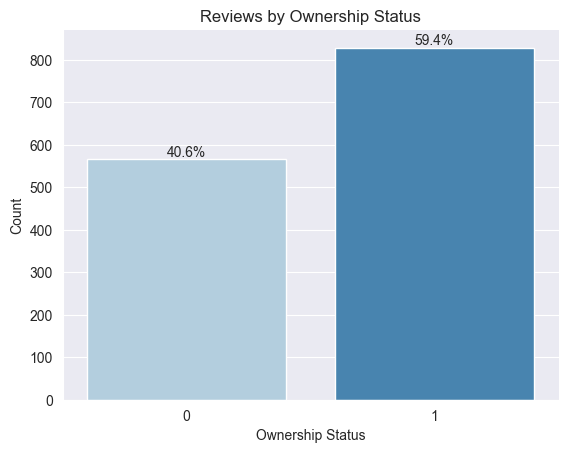

In [11]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
sns.set_style('darkgrid')   # set the style of the plot
sns.countplot(x='Owned', data=df, palette='Blues')   # create the countplot with given x, data and color palette
plt.title('Reviews by Ownership Status')   # set the title of the plot
plt.xlabel('Ownership Status')   # set the label of the x-axis
plt.ylabel('Count')   # set the label of the y-axis

# Add annotations to the plot
total = len(df['Owned'])   # calculate the total number of records in the 'Owned' column
for p in plt.gca().patches:   # loop through each rectangle patch in the plot
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)   # calculate the percentage of records associated with the current patch
    x = p.get_x() + p.get_width() / 2   # calculate the x-coordinate of the center of the patch
    y = p.get_height()   # set the y-coordinate to the height of the patch
    plt.annotate(percentage, (x, y), ha='center', va='bottom')   # add text annotation to the patch with given format and alignment

sns.despine()   # remove the top and right spines of the plot
plt.show()   # display the plot

# Task 3
To describe the distribution of the overall rating across the possible values we will use .describe() function and histplot.
The 25% value of 15.355 and the 75% value of 18.87 represent the 25th percentile and 75th percentile of the data respectively. The 50% value of 18.26 represents the median of the data. This suggests that the majority of the ratings are concentrated between 15.355 and 18.87, with the median rating being 18.26. Overall, the statistics suggest that the majority of the ratings are clustered around the mean, with a moderate amount of variation with 3 visable KDE peaks.

In [12]:
# Display descriptive statistics for the 'Overall_Rating' column of the DataFrame 'df'
df['Overall_Rating'].describe()

count    1395.000000
mean       17.156695
std         2.451987
min        11.690000
25%        15.355000
50%        18.260000
75%        18.870000
max        22.760000
Name: Overall_Rating, dtype: float64

## Histogram and KDE plot of the 'Overall_Rating'

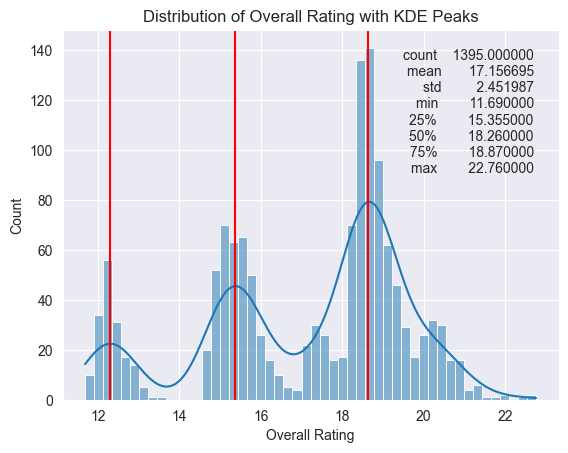

In [13]:
"This code creates a histogram and KDE plot of the 'Overall_Rating' column of a DataFrame 'df'. It uses the histplot() function from the seaborn library to create a histogram with 50 bins and a KDE plot with the kde=True argument. The get_lines() function is used to obtain the KDE plot from the histogram object and the find_peaks() function from the scipy.signal module is used to identify the peaks in the KDE plot. The x and y values of the KDE plot are extracted using the get_data() function and the peak positions are marked using the axvline() function with a red color."

# Import the find_peaks function from the scipy.signal module
from scipy.signal import find_peaks

# Create a histogram and kde plot of the 'Overall_Rating' column of DataFrame 'df'
hist = sns.histplot(df['Overall_Rating'], bins=50, kde=True)

# Get the kde plot from the histogram object
kde = hist.get_lines()[0]

# Add summary statistics to the plot
rating_stats = df['Overall_Rating'].describe()
plt.text(x=0.95, y=0.95, s=rating_stats.to_string(), transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right')

# Find peaks of kde plot
kde_x, kde_y = kde.get_data()
peaks, _ = find_peaks(kde_y)

# Add vertical lines at peak positions
for peak in peaks:
    plt.axvline(x=kde_x[peak], color='red')

# Add labels and title to the plot
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Distribution of Overall Rating with KDE Peaks')

# Show the plot
plt.show() 

# Task 4
The below visualization shows the relationship between the 'Owned' column, (which has two distinct values of 0 and 1), and the 'Overall_Rating' column, which is a continuous variable ranging from 0 to 25. The boxplots show the distribution of overall ratings for each value of owned, with the boxes representing the interquartile range and the median, and the whiskers extending to the minimum and maximum values within 1.5 times the interquartile range. Overall, it appears that items that are owned tend to have slightly higher overall ratings than those that are not owned.

## Box plot Owned / Owerall rating

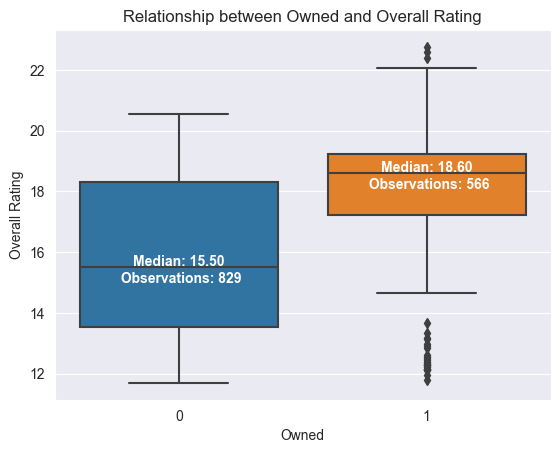

In [14]:
# Set style to 'darkgrid'
sns.set_style("darkgrid")

# Create boxplot with 'Owned' as x-axis and 'Overall_Rating' as y-axis
ax = sns.boxplot(x="Owned", y="Overall_Rating", data=df)

# Set title, x-label and y-label for the plot
plt.title("Relationship between Owned and Overall Rating")
plt.xlabel("Owned")
plt.ylabel("Overall Rating")

# Annotate key statistics on the plot
medians = df.groupby(['Owned'])['Overall_Rating'].median().values
nobs = df['Owned'].value_counts().values
stats = [f"Median: {med:.2f}\n Observations: {n}" for med, n in zip(medians, nobs)]
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] - 0.5, stats[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')

# Display the plot
plt.show()

## Point plot Owned / Owerall rating

The chart below visualizes the relationship between the ownership status of a product and its overall rating using a point plot with arrows indicating the mean rating for each ownership status.

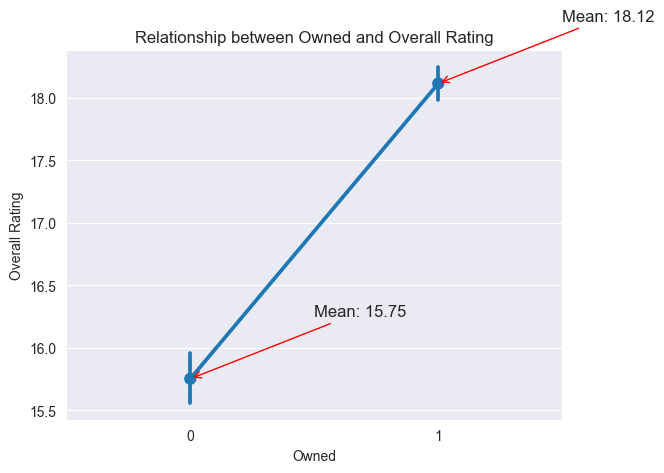

In [16]:
# Set style to 'darkgrid'
sns.set_style("darkgrid")

# Calculate means for Owned=0 and Owned=1
mean_owned_0 = df.loc[df['Owned'] == 0, 'Overall_Rating'].mean()
mean_owned_1 = df.loc[df['Owned'] == 1, 'Overall_Rating'].mean()

# Create point plot with Owned on the x-axis and Overall_Rating on the y-axis
ax = sns.pointplot(x="Owned", y="Overall_Rating", data=df)

# Set title, x-label and y-label for the plot
plt.title("Relationship between Owned and Overall Rating")
plt.xlabel("Owned")
plt.ylabel("Overall Rating")

# Add arrows to indicate the means for each category of 'Owned'
ax.annotate(f"Mean: {mean_owned_0:.2f}", xy=(0, mean_owned_0), xytext=(0.5, mean_owned_0+0.5),
            arrowprops=dict(color='red', arrowstyle="->"), ha='left', rotation=0, fontsize=12)
ax.annotate(f"Mean: {mean_owned_1:.2f}", xy=(1, mean_owned_1), xytext=(1.5, mean_owned_1+0.5),
            arrowprops=dict(color='red', arrowstyle="->"), ha='left', rotation=0, fontsize=12)

# Display the plot
plt.show()

The x-axis represents the two distinct values of Owned (0 and 1), while the y-axis represents the continuous Overall Rating score.
The mean of Overall Rating for each value of Owned (15.75 for 0; 18.12 for 1), along with a confidence interval - blue vertical line. 

# Task 5
The problem of predicting whether a review came from an owner or not using the provided data is a classification problem.
Classification is a type of machine learning problem where the goal is to predict which category or class a new observation belongs to, based on its features or characteristics. In this case, the categories are "owner" and "not owner", and the features may include aspects such as the language used in the review, the sentiment expressed, or the length of the review. Therefore, it is not a regression or clustering problem.

# Task 6
The code defines a list of features to use for the model imports the required modules for building a logistic regression model. We would use the OneHotEncoder to encode categorical variables with multiple categories into binary values. We would use MinMaxScaler to scale numerical variables to a range between 0 and 1 to normalize their values. Then we define a target variable y, which is "Owned", to finally define and fit a machine learning pipeline to a training dataset.

In [17]:
# Import required modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Define the model features
model_features = ['Make_Model', 'Review_Month', 'Web_Browser', 'Reviewer_Age', 'Primary_Use', 'Value_For_Money', 'Overall_Rating']

# Extract the numerical columns
num_cols = np.array(df.select_dtypes(include=["float64", "bool"]).columns)

In [18]:
# select the numerical columns
X = df[model_features]

# define the target variable
y = df['Owned']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X 

,Make_Model,Review_Month,Web_Browser,Reviewer_Age,Primary_Use,Value_For_Money,Overall_Rating
0,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29
5,Lunna-Eyden,Aug,IE,47,Commuting,5,15.28
6,Lunna-Keetra,Mar,Chrome,20,Leisure,3,12.28
7,Nielah-Keetra,Mar,Chrome,32,Commuting,7,15.92
8,Nielah-Eyden,Mar,Chrome,35,Commuting,4,19.39
9,Nielah-Eyden,Jul,Firefox,22,Commuting,6,18.38


In [20]:
# checking if the shape is the same
X.shape[0] == y.shape[0] 

True

## Logistic Regression pipeline - a baseline model

I used Logistic Regression because it is a popular and simple classification algorithm that is easy to interpret and provides good performance for binary classification problems like this one. And as as a baseline model because it is a well-known and commonly used algorithm, and it can help us establish a performance baseline for more complex models.

In [22]:
# Import required modules
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Extract the numerical and categorical columns from the DataFrame 'X'
num_cols = np.array(X.select_dtypes(include=["float64", "int64"]).columns)
cat_cols = np.array(X.select_dtypes(include=["object"]).columns)

# Define the column transformers for numerical and categorical data
num_trans = MinMaxScaler()
cat_trans = OneHotEncoder(categories="auto")

# Define the preprocessing pipeline
preproc = make_column_transformer(
            (num_trans, num_cols),
            (cat_trans, cat_cols))

# Define the logistic regression model with balanced class weights
clf = LogisticRegression(class_weight='balanced')

# Define the pipeline with the preprocessing pipeline and logistic regression model
pipe = make_pipeline(preproc, clf)

# Fit the pipeline with training data
pipe.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['Reviewer_Age', 'Value_For_Money', 'Overall_Rating'], dtype=object)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  array(['Make_Model', 'Review_Month', 'Web_Browser', 'Primary_Use'],
      dtype=object))])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [23]:
# These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
np.set_printoptions(suppress=True)

# make predictions on the training set
y_pred = pipe.predict(X_test)
len(y_pred) 

419

# Task 7


## SVC pipeline - a comparison model 

I picked Support Vector Classifier (SVM), which is a good comparison model because it is a popular and powerful classification algorithm that is effective in high-dimensional spaces and can handle both linear and non-linear classification problems. In addition, it has the option to include class weights which can be useful in imbalanced datasets, making it a suitable model for the problem of predicting whether a review came from an owner or not using provided data, where there is an imbalance in the number of observations between the two classes. Therefore, the SVC model is a good comparison to the baseline logistic regression model.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the support vector classifier model with balanced class weights
clf = SVC(class_weight='balanced')

# Define the pipeline with the preprocessing pipeline and support vector classifier model
pipe = make_pipeline(preproc, clf) 

# Display the pipeline object
pipe 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  array(['Reviewer_Age', 'Value_For_Money', 'Overall_Rating'], dtype=object)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  array(['Make_Model', 'Review_Month', 'Web_Browser', 'Primary_Use'],
      dtype=object))])),
                ('svc', SVC(class_weight='balanced'))])

In [26]:
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Use the fitted pipeline to predict the labels for the test data
y_pred = pipe.predict(X_test)

# Print the number of predicted labels
len(y_pred)   

419

# Task 8 
Both Logistic Regression and SVM are well-established and widely used algorithms for binary classification tasks. Logistic Regression is a simple and efficient algorithm that can model the probability of a binary outcome using a linear combination of features. It is also interpretable and easy to tune. SVM, on the other hand, can handle non-linear decision boundaries by mapping the features to a higher-dimensional space. It can also handle high-dimensional feature spaces and is less prone to overfitting.
Both Logistic Regression and SVM can handle imbalanced datasets, which is common in binary classification problems. They can also handle large datasets and are relatively fast to train. 

The choice of Logistic Regression and SVM for the given binary classification problem seems appropriate, as they are both well-suited for this type of task and can provide accurate predictions with good generalization performance. However, the ultimate choice of the model would depend on the specific characteristics of the data and the performance metrics of interest. Overall, the ability of these models to handle high-dimensional text data makes them well-suited for predicting whether a review came from an owner or not.

# Task 9
We used this code to evaluate the performance of a logistic regression and SVC models with different regularization strengths on the preprocessed data using a pipeline. The code helps us to determine the optimal value of the regularization hyperparamether 'C' for the model that results in the best performance, by computing and displaying a confusion matrix and several evaluation metrics such as accuracy, F1 score, precision, and recall. The evaluation of the model is important to ensure that it is generalizing well and is not overfitting or underfitting the training data. 

## Logistic Regression performance - a baseline model

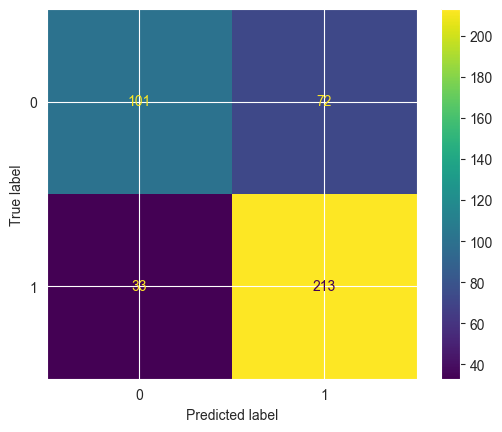

Model Accuracy: 0.75   |   Model F1 Score: 0.80
Model Precision: 0.75 |   Model Recall: 0.87


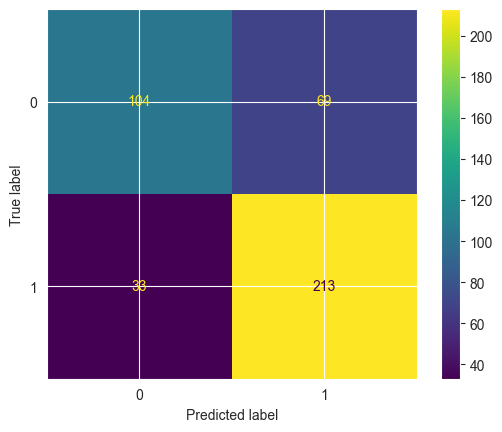

Model Accuracy: 0.76   |   Model F1 Score: 0.81
Model Precision: 0.76 |   Model Recall: 0.87


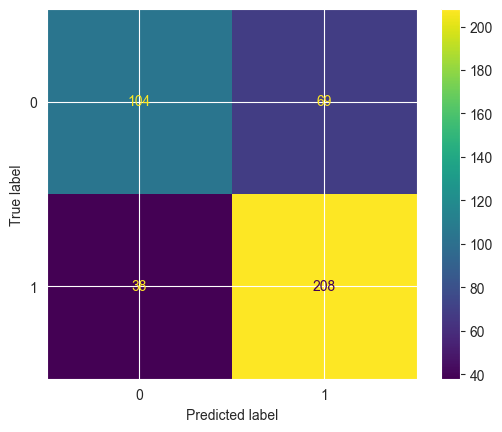

Model Accuracy: 0.74   |   Model F1 Score: 0.80
Model Precision: 0.75 |   Model Recall: 0.85


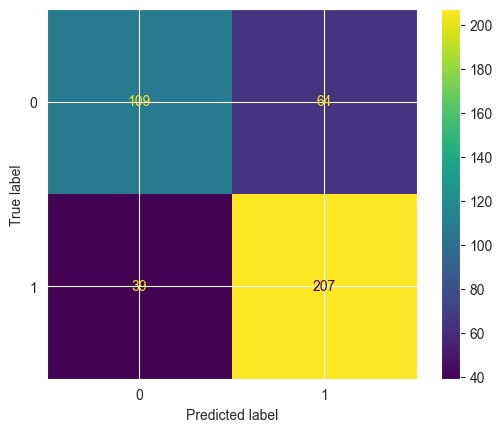

Model Accuracy: 0.75   |   Model F1 Score: 0.80
Model Precision: 0.76 |   Model Recall: 0.84


In [27]:
# Import required modules
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# Define the values of C to try for regularization
c_params = [0.3, 0.5, 1, 10]

# Iterate over the values of C
for i in c_params:
    # Create a new pipeline with the current value of C
    scaler = StandardScaler()
    clf = LogisticRegression(C=i) 
    pipe = make_pipeline(preproc, clf)

    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)     

    # Make predictions on the test set with a custom threshold 
    y_prob = pipe.predict_proba(X_test)[:, 1] # Get probabilities of positive class
    y_pred = (y_prob > 0.5).astype(int) # Apply custom threshold 
    
    # Compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp.plot() 
    plt.show() 

    # Compute the accuracy, F1 score, precision, and recall of the predictions
    model_accuracy = accuracy_score(y_test, y_pred)
    model_f1 = f1_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred)
    model_recall = recall_score(y_test, y_pred) 
    print(f"Model Accuracy: {model_accuracy:.2f}   |   Model F1 Score: {model_f1:.2f}\n"
      f"Model Precision: {model_precision:.2f} |   Model Recall: {model_recall:.2f}") 

## SVC performance - a comparison model

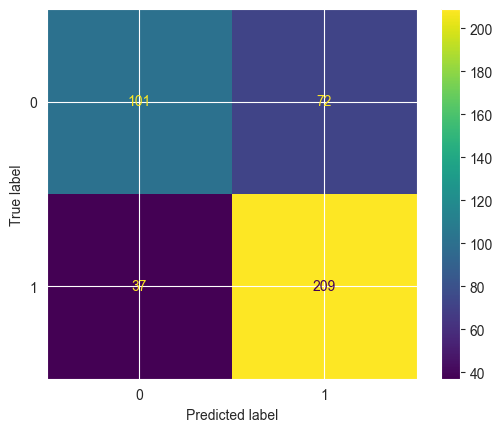

Model Accuracy: 0.74   |   Model F1 Score: 0.79
Model Precision: 0.74 |   Model Recall: 0.85


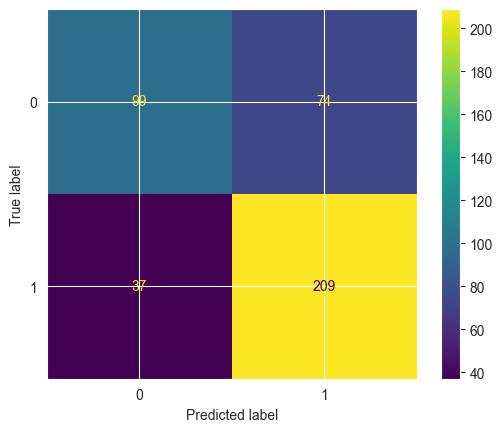

Model Accuracy: 0.74   |   Model F1 Score: 0.79
Model Precision: 0.74 |   Model Recall: 0.85


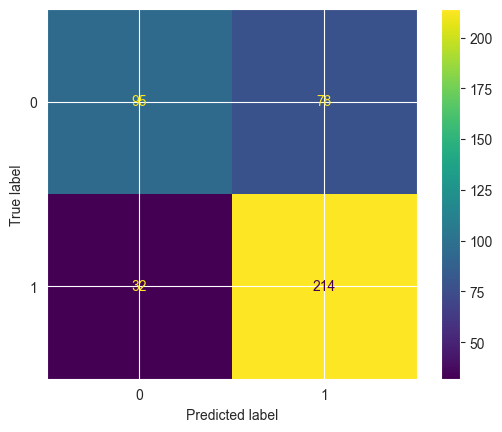

Model Accuracy: 0.74   |   Model F1 Score: 0.80
Model Precision: 0.73 |   Model Recall: 0.87


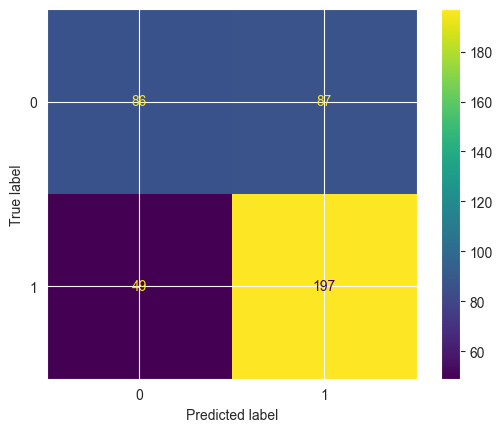

Model Accuracy: 0.68   |   Model F1 Score: 0.74
Model Precision: 0.69 |   Model Recall: 0.80


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define the values of C to try for regularization
c_params = [0.3, 0.5, 1, 10]

# iterate over the values of C
for i in c_params:
    # create a new pipeline with the current value of C
    clf = SVC(C=i, probability=True) 
    pipe = make_pipeline(preproc, clf)

    # fit the pipeline to the training data
    pipe.fit(X_train, y_train)     

    # make predictions on the training set with a custom threshold 
    y_prob = pipe.predict_proba(X_test)[:, 1] # get probabilities of positive class
    y_pred = (y_prob > 0.5).astype(int) # apply custom threshold 
    
    # compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp.plot() 
    plt.show() 
    # compute the accuracy, F1 score, precision, and recall of the predictions
    model_accuracy = accuracy_score(y_test, y_pred)
    model_f1 = f1_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred)
    model_recall = recall_score(y_test, y_pred) 
    print(f"Model Accuracy: {model_accuracy:.2f}   |   Model F1 Score: {model_f1:.2f}\n"
      f"Model Precision: {model_precision:.2f} |   Model Recall: {model_recall:.2f}") 

# Task 10
Assuming the business wants to reduce the number of false negatives, then they should focus on increasing the recall metric. Recall measures the proportion of actual positives that are correctly identified by the classifier, which is equivalent to the true positive rate. By maximizing recall, the classifier will be able to capture as many true positives as possible, while accepting a higher number of false positives. A false negative would mean that a review written by an owner was mistakenly classified as written by a non-owner. This could be detrimental to the business, as they would miss valuable feedback and lose potential business from owners who were dissatisfied with their experience. Therefore, to reduce the number of false negatives, the business should optimize for high recall while keeping precision reasonably high. 

To conclude, the Logistic model might be a better choice as it has higher recall value compared to the SVC model and higher precision - for a C value of 0.5!

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam